Conectado a Python 3.13.3

 ## 1. Importar librerías

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 ## 2. Cargar datos de Instacart

 Cargamos los archivos necesarios para el análisis de canasta de mercado:
 - products.csv: Información de productos
 - orders.csv: Información de pedidos
 - order_products__prior.csv: Productos por pedido

 Filtramos los primeros 10,000 pedidos para un análisis rápido.

In [ ]:
# Cargar productos
df_products = pd.read_csv('instacart-market-basket-analysis/products.csv/products.csv')
# Cargar pedidos
df_orders = pd.read_csv('instacart-market-basket-analysis/orders.csv/orders.csv')
# Cargar productos por pedido (prior)
df_order_products = pd.read_csv('instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv')

# Filtrar los primeros 10,000 pedidos
first_orders = df_orders['order_id'].unique()[:10000]
df_order_products_sample = df_order_products[df_order_products['order_id'].isin(first_orders)]

# Unir con nombres de productos
df_order_products_sample = df_order_products_sample.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
df_order_products_sample.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,40,10070,1,1,Organic 1% Low Fat Milk
1,40,42450,2,1,Macaroni & Cheese
2,40,33198,3,1,Sparkling Natural Mineral Water
3,40,34866,4,1,Chocolate Milk 1% Milkfat
4,214,5499,1,0,Organic Cream Of Chicken Condensed Soup


 ## 3. Preparar la matriz de transacciones (one-hot encoding)

 Convertimos los datos a una matriz de transacciones donde cada fila es un pedido y cada columna es un producto (1 si se compró, 0 si no).

In [ ]:
# Crear una tabla de transacciones: filas=pedidos, columnas=productos
basket = (
    df_order_products_sample
    .groupby(['order_id', 'product_name'])
    .size()
    .unstack(fill_value=0)
)

# Convertir a 1/0 (presencia/ausencia)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

product_name,#2 Coffee Filters,0 Calorie Fuji Apple Pear Water Beverage,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Fat Vanilla Greek Yogurt,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Mango Fruit Bar,...,Zucchini Squash,"\""Constant Comment\"" Decaffeinated Black Tea Blend",for All Mouth Sores Fresh Mint Oral Debriding Agent/Antiseptic Rinse/Pain Reliever,fruitwater® Strawberry Kiwi Sparkling Water,gel hand wash sea minerals,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs
order_id,,,,,,,,,,,,,,,,,,,,,
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 ## 4. Aplicar Apriori y generar reglas de asociación

 Aplicamos el algoritmo Apriori para encontrar conjuntos de productos frecuentes y generamos reglas de asociación con un soporte mínimo de 0.01 y un lift mínimo de 1.2.

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
18,(Organic Hass Avocado),(Organic Cucumber),0.010035,0.131653,3.890191
19,(Organic Cucumber),(Organic Hass Avocado),0.010035,0.296530,3.890191
4,(Organic Raspberries),(Bag of Organic Bananas),0.016014,0.357143,3.111960
5,(Bag of Organic Bananas),(Organic Raspberries),0.016014,0.139535,3.111960
20,(Organic Hass Avocado),(Organic Raspberries),0.010142,0.133053,2.967404
21,(Organic Raspberries),(Organic Hass Avocado),0.010142,0.226190,2.967404
25,(Organic Strawberries),(Organic Raspberries),0.011316,0.132666,2.958764
24,(Organic Raspberries),(Organic Strawberries),0.011316,0.252381,2.958764
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.024554,0.213953,2.806866
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.024554,0.322129,2.806866


 ## 5. Visualización de reglas de asociación

 Visualizamos las reglas de asociación en un gráfico de dispersión para identificar patrones de compra.

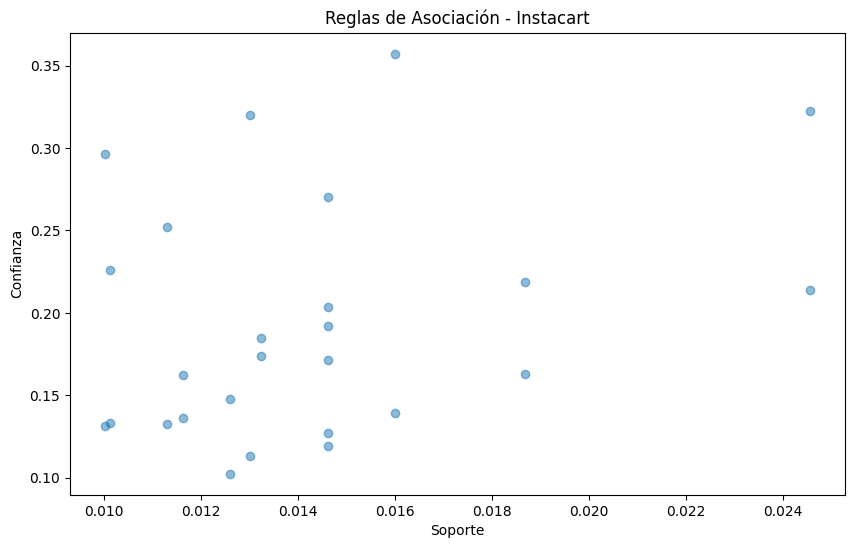

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Reglas de Asociación - Instacart')
plt.show() 

# %% [markdown]

 ## 1. Importar librerías